In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
IrisDF = pd.read_csv("/content/iris.csv")

In [ ]:
IrisDF.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
IrisDF.shape

(150, 6)

In [ ]:
IrisDF.drop(IrisDF.columns[0],axis=1,inplace=True)

In [ ]:
IrisDF.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
IrisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
IrisDF.describe()
#same range value so,Minmaxscaler not needed

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


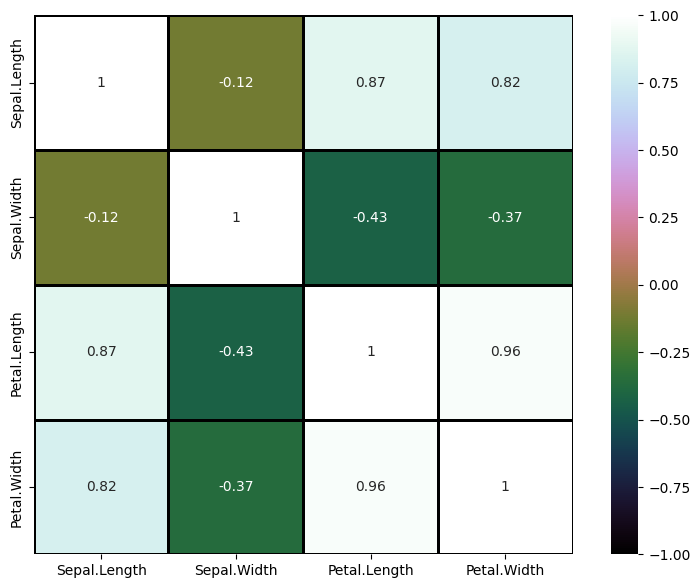

In [ ]:
#from info() function its clear that each column has any value(non null)
print(IrisDF.isnull().sum())
#lets visualize
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(IrisDF.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"})

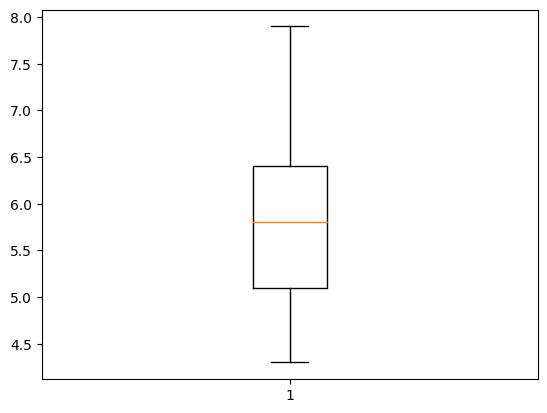

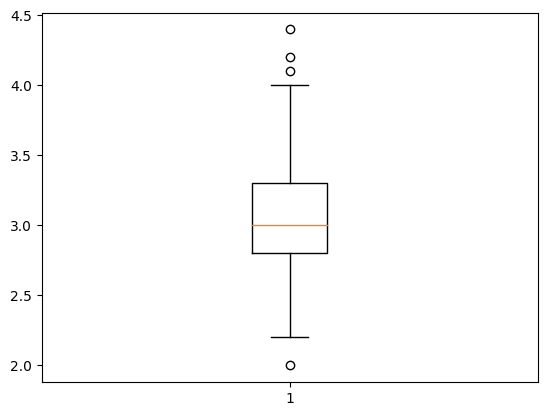

In [ ]:
#Checking for outliers
plt.figure(1)
plt.boxplot([IrisDF['Sepal.Length']])
plt.figure(2)
plt.boxplot([IrisDF['Sepal.Width']])
plt.show()


<Axes: xlabel='Species', ylabel='Sepal.Width'>

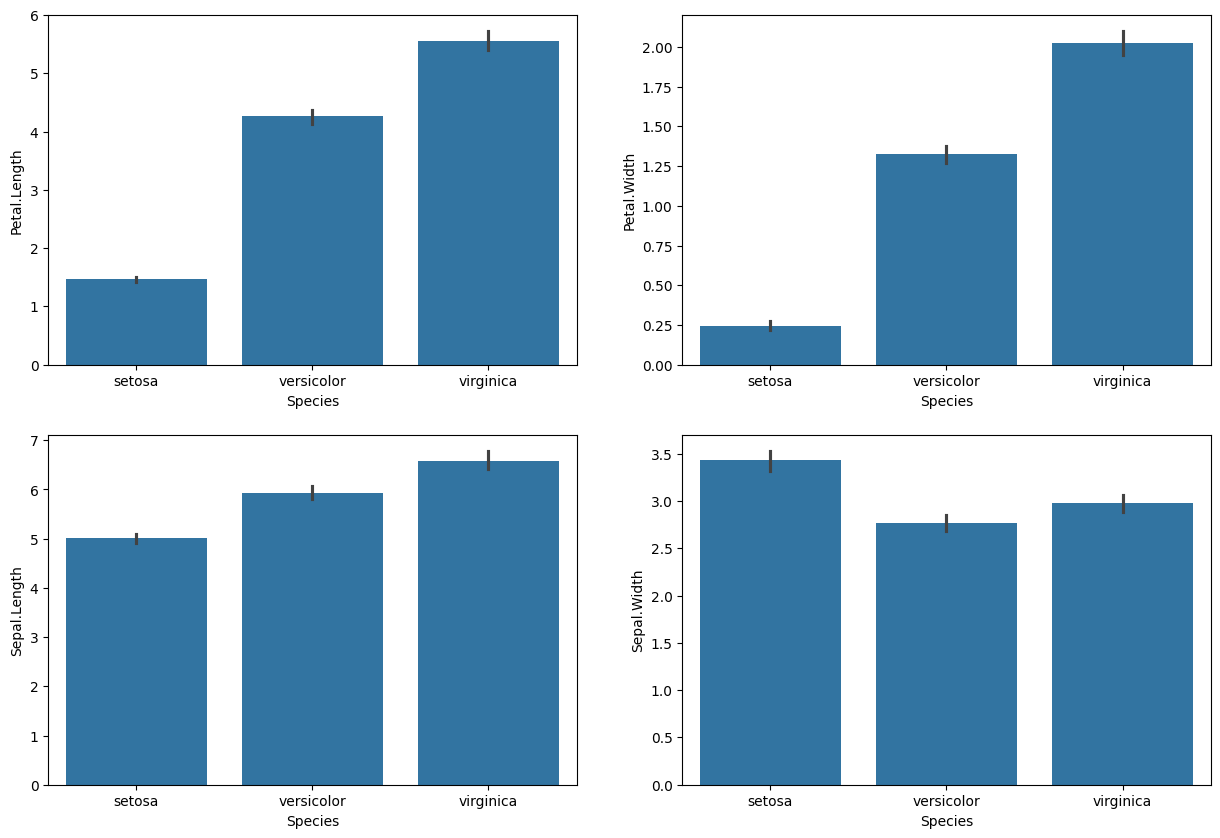

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x='Species',y='Petal.Length',data=IrisDF)
plt.subplot(2,2,2)
sns.barplot(x='Species',y='Petal.Width',data=IrisDF)
plt.subplot(2,2,3)
sns.barplot(x='Species',y='Sepal.Length',data=IrisDF)
plt.subplot(2,2,4)
sns.barplot(x='Species',y='Sepal.Width',data=IrisDF)

<Axes: xlabel='Petal.Length', ylabel='Sepal.Width'>

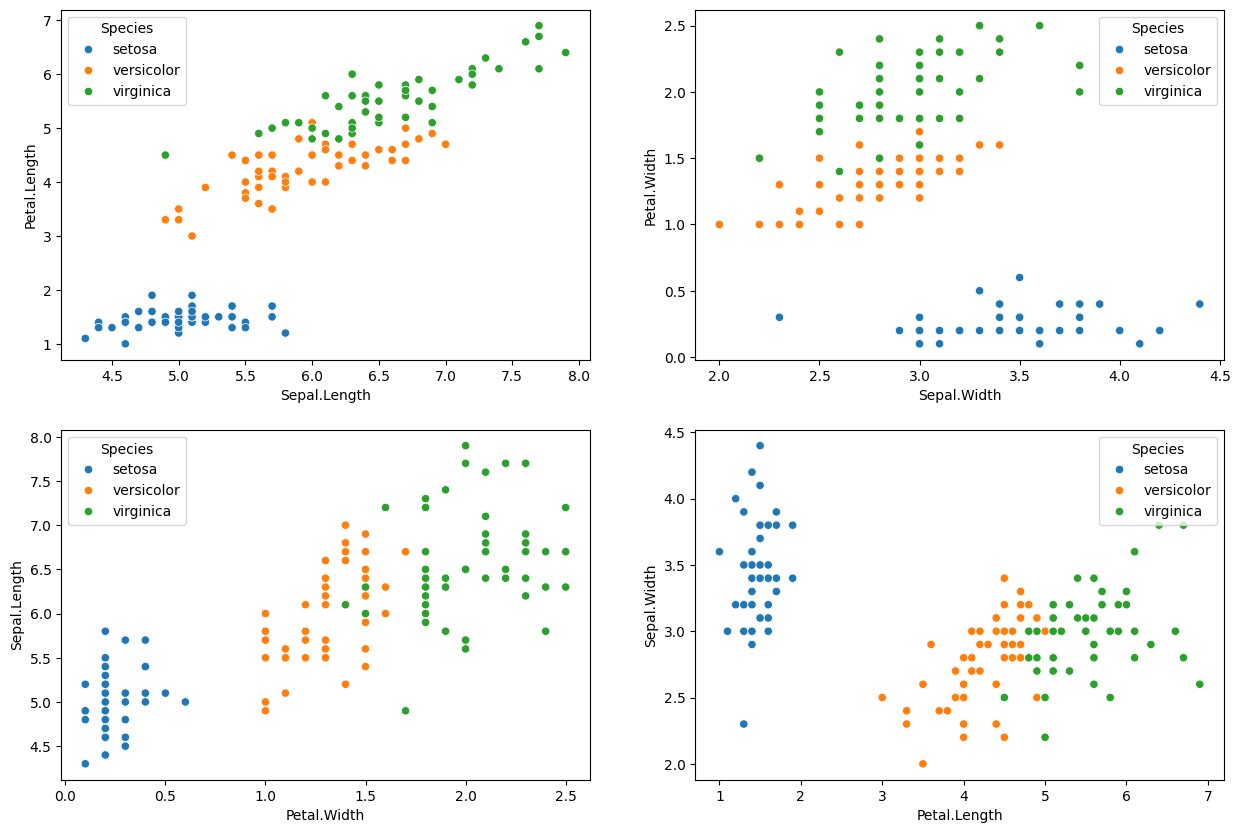

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='Sepal.Length',y='Petal.Length',hue ="Species",data=IrisDF)
plt.subplot(2,2,2)
sns.scatterplot(x='Sepal.Width',y='Petal.Width',hue ="Species",data=IrisDF)
plt.subplot(2,2,3)
sns.scatterplot(x='Petal.Width',y='Sepal.Length',hue ="Species",data=IrisDF)
plt.subplot(2,2,4)
sns.scatterplot(x='Petal.Length',y='Sepal.Width',hue ="Species",data=IrisDF)

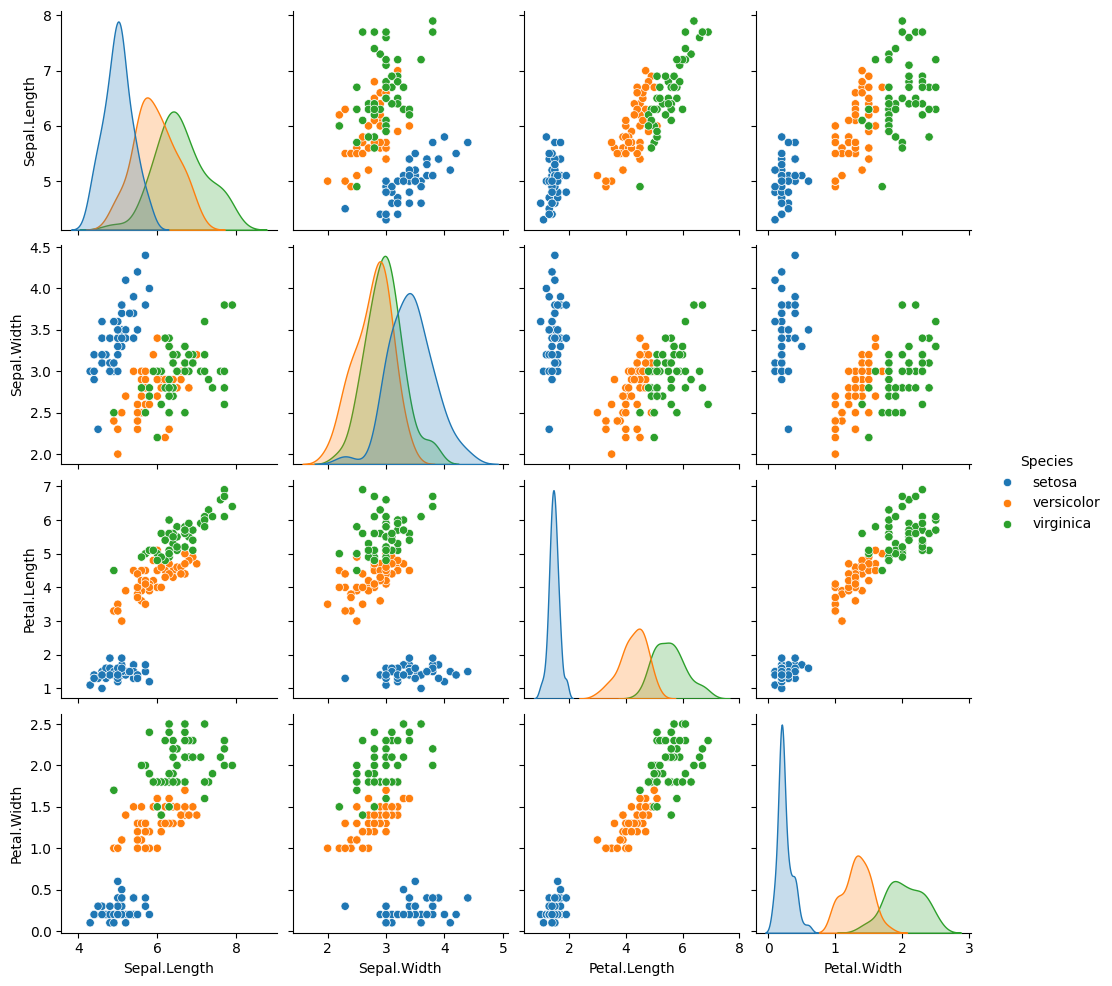

In [ ]:
# Visualize the whole dataset
sns.pairplot(IrisDF, hue='Species')

# from this setosa can be easily classified but verginica and versicolor are overlapping in some aspects
#And iris virginica is the longest flower and iris setosa is the shortest

In [ ]:
X = IrisDF[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y = IrisDF.Species

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
94,5.6,2.7,4.2,1.3
135,7.7,3.0,6.1,2.3
21,5.1,3.7,1.5,0.4
22,4.6,3.6,1.0,0.2
29,4.7,3.2,1.6,0.2


In [ ]:
X_train.shape

(112, 4)

In [ ]:
y_train.shape

(112,)

In [ ]:
y_train.head()

94     versicolor
135     virginica
21         setosa
22         setosa
29         setosa
Name: Species, dtype: object

In [ ]:
#Using LogisticRegression
#model1
model1 = LogisticRegression()

model1.fit(X_train,y_train )

prediction = model1.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 1.0


Text(0, 0.5, 'y_pred')

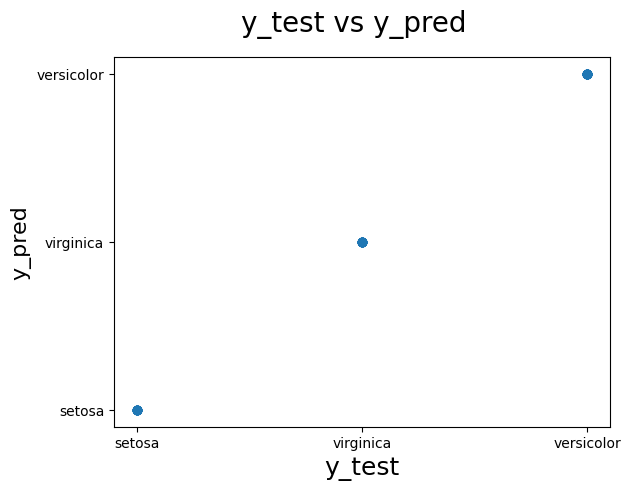

In [ ]:
fig = plt.figure()
plt.scatter(y_test,prediction)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [ ]:
#Using Support Vector
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train,y_train)

prediction2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,prediction2))

Acc= 1.0


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)

print(classification_report(y_test,prediction2))

Confusion matrix: 
 [[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
y_test

33         setosa
16         setosa
43         setosa
129     virginica
50     versicolor
123     virginica
68     versicolor
53     versicolor
146     virginica
1          setosa
147     virginica
32         setosa
31         setosa
122     virginica
127     virginica
74     versicolor
88     versicolor
96     versicolor
42         setosa
134     virginica
80     versicolor
48         setosa
90     versicolor
65     versicolor
97     versicolor
64     versicolor
93     versicolor
114     virginica
25         setosa
41         setosa
104     virginica
89     versicolor
116     virginica
82     versicolor
112     virginica
55     versicolor
86     versicolor
61     versicolor
Name: Species, dtype: object

In [ ]:
prediction

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [ ]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.9736842105263158


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

confusion_mat = confusion_matrix(y_test,y_pred3)
print("Confusion matrix: \n",confusion_mat)

print(classification_report(y_test,y_pred3))

Confusion matrix: 
 [[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
input_data = input("Enter values as:")
list  = input_data.split(",")
#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(list)
print(input_data_as_numpy_array)
#reshapr the data
reshaped_data = input_data_as_numpy_array.reshape(1,-1)
#debug
print(reshaped_data)

prediction = model2.predict(reshaped_data)
print(prediction)

Enter values as:12,4,10,5
['12' '4' '10' '5']
[['12' '4' '10' '5']]
['virginica']
